---
jupyter:
  jupytext:
    text_representation:
      extension: .Rmd
      format_name: rmarkdown
      format_version: '1.2'
      jupytext_version: 1.3.2
  kernelspec:
    display_name: Python 3
    language: python
    name: python3
---

# Simulation of a positron-induced Muon Source

Ardino Rocco, Manzali Francesco, Paccagnella Andrea, Valente Alessandro


# Index <a class="anchor" id="Report.index"></a>

1. [Description and Relevant formulas](#Report.1)
2. [Monte Carlo with monochromatic beam](#Report.2)
3. [Beryllium target statistics](#Report.3)
4. [Monte Carlo with non-monochromatic beam](#Report.4)
5. [Tracking detector statistics](#Report.5)
6. [Comparison with Babayaga simulator results](#Report.6)

<!-- #region -->
# 1. Description and Relevant formulas <a class="anchor" id="#Report.1"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

The main goal of this project is to produce a Monte Carlo simulation for the scattering $e^+ + e^- \to \mu^+ + \mu^-$, with $\sqrt{s} \sim 2 m_\mu$ close to the muon production threshold. 

In the following, all quantities denoted with a star ($^*$) are measured in the center of mass (CM) frame of reference, while quantities without it refer to the laboratory frame. Also, $c=1$ for all computations.

The leading-order **differential cross-section** for the unpolarized scattering $e^+ + e^- \to \mu^+ + \mu^-$ in the CM frame has the following expression [[1]](#quotes.diffcross), as function of the total energy $\sqrt{s}$ in the CM frame, and the emission angles $\theta^*$ and $\Omega^*$:

$$\frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*}(\sqrt{s},\theta^*, \varphi^*) = \frac{\alpha^2}{4s} \left(1- \frac{4 m_\mu^2}{s}\right)^{1/2} \left(1- \frac{4 m_e^2}{s}\right)^{-1/2}\left( 1+ \frac{4}{s} (m_e^2 + m_\mu^2) + \left(1-\frac{4 m_e^2}{s}\right)\left(1-\frac{4 m_\mu^2}{s}\right)\cos^2\theta^*\right) \label{eqn:diff-cross}\tag{1.1}$$

Integration over the sphere leads to the **total cross section**:

$$\sigma^*(\sqrt{s}) = \int_0^\pi \sin\theta^* \mathrm{d}\theta^* \int_0^{2\pi} {\rm d}\varphi^* \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*}(\sqrt{s},\theta^*,\varphi^*) = \frac{4\pi \alpha^2}{3 s^3} \frac{\sqrt{1-\frac{4 m_\mu^2}{s}}}{\sqrt{1-\frac{4 m_e^2}{s}}} (2 m_e^2 + s)(2m_\mu^2 + s) \label{eqn:cross}\tag{1.2}$$

For a fixed energy $\sqrt{s}$, the angle distribution $f(\theta^*, \varphi^*)$ of the scattered particles is given by normalizing the differential cross-section:

$$f(\theta^*,\varphi^*) = \frac{1}{\sigma} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} (\sqrt{s}, \theta^*, \varphi^*) \label{eqn:angular}\tag{1.3}$$

As the scattering process possesses cylindrical symmetry, the differential cross section does not depend on $\varphi^*$. This means that $f(\theta^*, \varphi^*)$ can be factored into two independent **angular distributions**, $g(\theta^*)$ for the $\theta^*$ angle, and a uniform $h(\varphi^*)$ for the $\varphi^*$ angle:

$$g(\theta^*) = \frac{\mathrm{d}\sigma^*}{\mathrm{d}\theta^*} = \int_0^{2\pi} \mathrm{d}\varphi^* \frac{1}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} \sin\theta^* = \frac{2\pi \sin\theta^*}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*}; \qquad h(\varphi^*) = \int_0^\pi \sin(\theta^*)\mathrm{d}{\theta^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} = \frac{1}{2\pi} \label{eqn:gh}\tag{1.4}$$

We consider the $e^-$ stationary in the laboratory frame, so that $\beta_{e^-} = 0$. This means that the velocity $\beta$ of the CM frame with respect to the laboratory is $\beta = \beta^*_{e^-}$. We can express it as a function of $\sqrt{s}$ as follows. First, note that the electron/positron $4$-momenta in the CM frame are:

$$ p_{e^\pm}^* = (\mathcal{E}_{e^\pm}^*, \pm \vec{p}_{e^+}^*); \qquad \mathcal{E}_{e^\pm}^* = \sqrt{m_e^2 + ||\vec{p}_e^*||^2}$$

where $\vec{p}_{e^+}^*$ is the positron $3$-momentum in the CM frame.


So $s$ is equal to:
$$ s = (p_{e^-}^* + p_{e^+}^*)^2 = 4(m_e^2 + ||\vec{p}_e^*||^2) = 4 (\mathcal{E}^*_e)^2 \Rightarrow \mathcal{E}_e^* = \frac{\sqrt{s}}{2} \label{eqn:Ee}\tag{1.5}$$
Then:
$$\beta^*_e = \beta = \frac{||\vec{p}_e^*||^2}{\mathcal{E}_e^*} = \frac{\sqrt{(\mathcal{E}_e^*)^2 - m_e^2}}{\mathcal{E}_e^*} = \sqrt{1- \frac{m^2_e}{(\mathcal{E}_e^*)^2}} = \sqrt{1-\frac{4 m_e^2}{s}} \label{eqn:betae}\tag{1.6}$$
<!-- #endregion -->

The same calculations can be done for the $\mu^{\pm}$, leading to:
$$\beta_{\mu^\pm}^* = \sqrt{1-\frac{4 m_\mu^2}{s}} \label{eqn:betamu}\tag{1.7}$$
Then, the norm of the muon $3$-momentum as function of $\sqrt{s}$ is:
$$||\vec{p}_\mu^*|| = \sqrt{(\mathcal{E}_\mu^*)^2 - m_\mu^2} = \sqrt{\frac{s}{4} - m_\mu^2} \label{eqn:pmu}\tag{1.8} $$

Knowing $\sqrt{s}$, $\theta^*$ and $\varphi^*$ uniquely identifies the muon $4$-momentum components:

$$ p^*_\mu = \left( \frac{\sqrt{s}}{2}, \vec{p}_\mu^* \right) \qquad \vec{p}_\mu^* = ||\vec{p}_\mu^*|| (\cos \theta^*, \sin\theta^* \cos\varphi^*, \sin\theta^*\sin\varphi^*) \label{eqn:pmusphere}\tag{1.9} $$


Finally, we can boost the angle $\theta^*$ and the $4$-momentum to the laboratory frame:

$$\tan\theta_\mu = \frac{\sin\theta^*_\mu}{\gamma \left( \cos\theta^*_\mu + \frac{\beta}{\beta^*_\mu} \right)} \label{eqn:angleboost}\tag{1.10}$$

$$ \begin{pmatrix}\mathcal{E} \\ p_x \\ p_y \\ p_z \end{pmatrix} = \begin{pmatrix} \gamma & \beta \gamma & 0 & 0 \\
\beta \gamma & \gamma & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} \mathcal{E}^* \\ p_x^* \\ p_y^* \\ p_z^* \end{pmatrix} \label{eqn:p-boost}\tag{1.11} $$

In [1]:
#Insert formula plots (see Zanetti_project file)?
#Need a uniform convention for axes. Here beam is along x, but in sec. 4 beam is along z.

In [2]:
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

#Constants
alpha = 0.00729735257
mmu = 105.66 #MeV
me = 0.511 #MeV

#Cross-section
def dsigma(s, theta):
    """Differential cross-section (1) [MeV^-2 sr^-1]"""
    return (alpha**2 / (4*s)) * (beta_mu(s) / beta_e(s)) * (1. + 4. * (me**2 + mmu**2) / s + beta_mu(s)**2 * beta_e(s)**2 * np.cos(theta)**2)

def sigma(s):
    """Total cross section (2) [MeV^-2]"""
    return (4 * np.pi * alpha**2) / (3 * s**3) * (beta_mu(s) / beta_e(s)) * (2 * me**2 + s) * (2 * mmu**2 + s)

#Distributions
def g(s, theta):
    """Distribution for theta* [First. eq. in (4)]"""
    
    return (2 * np.pi) * np.sin(theta) * (3 * s * (4 * (me**2 + mmu**2) + s) + 3 * (-4 * me**2 + s) * (-4*mmu**2 + s) * np.cos(theta)**2) / \
           (16 * np.pi * (2 * me**2 + s) * (2 * mmu**2 + s))

def g_cdf(s, theta):
    """CDF for the theta* distribution"""
    
    return (4 * (2 * me**2 + s) * (2 * mmu**2 + s) - 3 * s * (4 * me**2 + 4 * mmu**2 + s) * np.cos(theta) + (4 * me**2 - s) * (-4 * mmu**2 + s) * np.power(np.cos(theta),3)) / \
           (8 * (2 * me**2 + s) * (2 * mmu**2 + s))

#Kynematics functions
def beta_mu(s):
    """beta_mu* (eq. 7)"""
    return np.sqrt(1 - 4*(mmu**2)/s)

def beta_e(s):
    """beta_e* = beta (eq. 6)"""
    return np.sqrt(1 - 4*(me**2)/s)

def gamma_e(s):
    """gamma_e^* = gamma"""
    return 1 / np.sqrt(1 - beta_e(s)**2)

def p_mu_cm(s):
    """Norm of muon 3-momentum in CM (eq. 8)"""
    return np.sqrt(s/4 - mmu**2)

#Boosts
def theta_boost(s, theta_cm):
    """Converts theta* (measured in CM) for a muon into tan(theta) (measured in laboratory)"""
    
    return np.sin(theta_cm) / \
           (gamma_e(s) * (np.cos(theta_cm) + beta_e(s)/beta_mu(s)))

def energy_x_boost(s, x_cm):
    """Boosts E* => E, and x^* => x (from CM to lab frame), with the following formula:
        E = gamma * ( E_cm        + beta * x_cm )
        x = gamma * ( beta * E_cm + x_cm        )
        with beta = beta_e(s), and E_cm = sqrt(s)/2
    """
    
    E_cm  = np.sqrt(s) / 2
    gamma = gamma_e(s)
    beta  = beta_e(s)
    
    return (gamma * ( E_cm + beta * x_cm ), gamma * (beta * E_cm + x_cm))

#Utility
def to_cartesian(norm, theta, phi):
    """Returns cartesian components of 3-vector (eq. 9)"""
    sintheta = np.sin(theta)
    return (norm * np.cos(theta), norm * sintheta * np.cos(phi), norm * sintheta * np.sin(phi))

C:\Users\39349\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


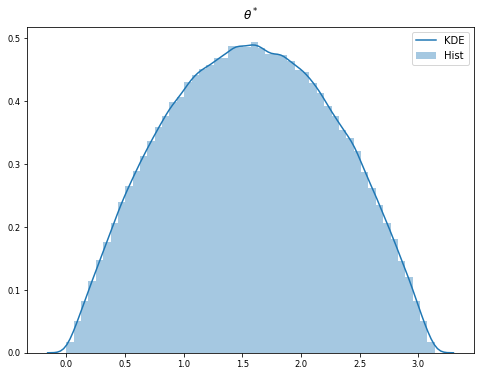

In [3]:
#Plots
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']}) #need to install the font
rc('xtick', labelsize='small')
rc('ytick', labelsize='small')
rc('axes', titlesize='large', labelsize='medium')

gratio = (np.sqrt(5) - 1)/2

sqrs = 214 #fix center of mass energy to 230 MeV
s = sqrs**2

#Compute inverse CDF of g(theta*) by interpolation
xs = np.linspace(0, np.pi, 1000)
inv_cdf = interp1d(g_cdf(230**2, xs), xs, fill_value="extrapolate") #need to extrapolate for extrema values (z = 0,1)

#Sample some angles
num_samples = 500000
unif_samples = np.random.uniform(size=num_samples)
thetas = inv_cdf(unif_samples)
phis   = np.random.uniform(0, 2 * np.pi, size=num_samples)

p_norm = p_mu_cm(s)

#Theta
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.distplot(thetas, kde_kws={'kernel': 'gau', 'label': 'KDE'}, hist_kws={'label': 'Hist'}, ax=ax)
ax.set_title(r"$\theta^*$")
plt.legend()

For every event, two muons are generated, with opposite angles $\theta^*_1 = -\theta^*_2$ and $\varphi^*_1 = - \varphi^*_2$. By symmetry, the distribution of their $3$-momentum components are the same. Also, as the process is cylindrically symmetric, the distributions for $p_y^*$ and $p_z^*$ are the same.

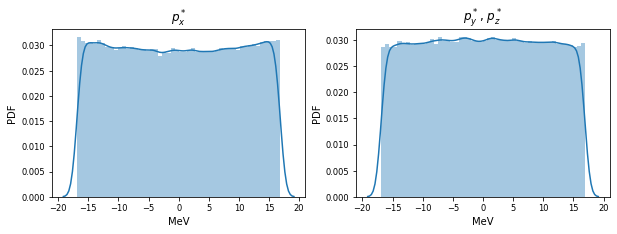

In [4]:
#Momentum CM
fig, (a_px, a_py) = plt.subplots(1, 2, figsize=(10, 10*gratio/2))

a_px.set_title("$p_x^*$")
a_px.set_xlabel("MeV")
a_px.set_ylabel("PDF")
px_cm = p_norm * np.cos(thetas)
sns.distplot(px_cm, ax=a_px)

a_py.set_title("$p_y^*$, $p_z^*$")
a_py.set_xlabel("MeV")
a_py.set_ylabel("PDF")
sns.distplot(p_norm * np.sin(thetas) * np.cos(phis), ax=a_py)


Text(0, 0.5, 'pdf($\\tan\\>\\theta$)')

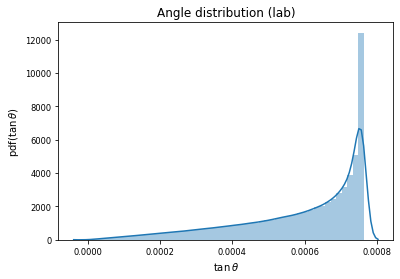

In [5]:
#Angle (laboratory)
ths_cm_boosted = theta_boost(s, thetas)
ths_cm_boosted2 = theta_boost(s, -thetas)

ax = sns.distplot(ths_cm_boosted)
ax.set_title("Angle distribution (lab)")
ax.set_xlabel(r"$\tan\>\theta$")
ax.set_ylabel(r"pdf($\tan\>\theta$)")

The momentum distributions $p_y$ and $p_z$ are the same as the ones for $p_y^*$ and $p_z^*$, as they are orthogonal to the boost axis. So, the only interesting distributions are that of energy and $p_x$.

In [6]:
#Momentum boost
E_cm = sqrs / 2
E_mu_lab  = gamma_e(s) * (E_cm  - px_cm*beta_e(s))
#E_mu_lab2 = gamma_e(s) * (E_cm  + px_cm*beta_e(s))
px_mu_lab = gamma_e(s) * (px_cm + E_cm *beta_e(s))

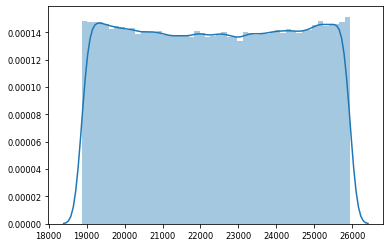

In [7]:
sns.distplot(E_mu_lab)

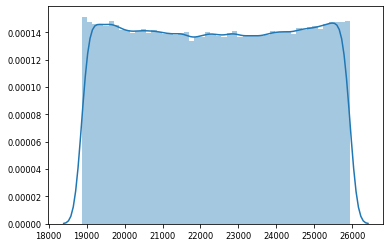

In [8]:
sns.distplot(px_mu_lab)

In [9]:
#TO DO: Sistemare i plot precedenti (labels, impaginazione, etc.)
#Aggiungere confronto con plot di babayaga

## Esperimenti (plot a caso per verificare robe, saranno poi rimossi)

In [10]:
#sns.jointplot(x=E_mu_lab1/1000, y=ths_cm_boosted*100, kind="hex", ylim=(0,0.5), 
#              xlim=(10,30), joint_kws=dict(gridsize=10), bins='log')

In [11]:
#from matplotlib.colors import LogNorm

In [12]:
#plt.hist2d(E_mu_lab1/1000, ths_cm_boosted*100, norm=LogNorm(), bins=(150,150), range=[[0,30],[0,0.5]])
#plt.show() #viene un po' troppo "sottile"

In [13]:
#ss = np.linspace(211.5, 230, 100)
#plt.plot(ss,sigma(ss**2) * 389.4 * 1e6) #questo viene come nel paper

In [14]:
#def theta_max(s):
  #  return 4 * me / s * np.sqrt(s/4 - mmu**2)

#print(theta_max(s))

#print(np.max(ths_cm_boosted))

#vengono diverse, ma non di molto. L'approssimazione è migliore per sqrt(s) vicini alla soglia. Non dovrebbe essere un problema

# 2. Monte Carlo with monochromatic beam <a class="anchor" id="Report.2"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

The first step in the simulation of the process is a Monte Carlo simulation in the condition of a monochromatic bean, namely a beam with the following characteristics:
* its transversal section is point-like;
* the energy of its particles is the same.

For this purpose the inverse transform method was chosen, since the CDF of the distribution $g(\theta^*)$ is analytic and so it is easy to implement, with better performances. Concerning the distribution $h(\varphi^*)$, it is uniform in $[0,2\pi]$, so it is easy to sample and we will focus on sampling $g(\theta^*)$. Hence, known:

$$
g(\theta^*) = 
\frac{\mathrm{d}\sigma^*}{\mathrm{d}\theta^*} = 
\int_0^{2\pi} \mathrm{d}\varphi^* \frac{1}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*} \sin\theta^* = 
\frac{2\pi \sin\theta^*}{\sigma^*} \frac{\mathrm{d}\sigma^*}{\mathrm{d}\Omega^*},
$$

$\text{CDF}[g(\theta^*)]$ can be computed through:

$$
\begin{align}
    \text{CDF}[g(\theta^*)]
    =& 
    \int_{0}^{\theta^*} g(\theta^*) \mathrm{d} \theta^* \\
    %=& 
    %\int_{0}^{\theta^*}\frac{2\pi \sin\theta^*}{\sigma} \frac{\alpha^2}{4s} \left(1- \frac{4 m_\mu^2}{s}\right)^{1/2} \left(1- \frac{4 m_e^2}{s}\right)^{-1/2}\left[ 1+ \frac{4}{s} (m_e^2 + m_\mu^2) + \left(1-\frac{4 m_e^2}{s}\right)\left(1-\frac{4 m_\mu^2}{s}\right)\cos^2\theta^*\right] \\
    =& 
    \frac{2\pi}{\sigma} \frac{\alpha^2}{4s} \left(1- \frac{4 m_\mu^2}{s}\right)^{1/2} \left(1- \frac{4 m_e^2}{s}\right)^{-1/2} \times \\
    & \times \left\{ \left[1+ \frac{4}{s} (m_e^2 + m_\mu^2)\right] (1 - \cos\theta^*) + \frac{1}{3}\left(1-\frac{4 m_e^2}{s}\right)\left(1-\frac{4 m_\mu^2}{s}\right)(1 - \cos^3\theta^*)\right\} \tag{1.12}
\end{align}
$$

The inverse of the CDF is computed by interpolation through `scipy` function `interp1d`. Finally, the event generation rule is the following:

$$
\begin{align}
    r_i \ &\text{random uniform in} \ [0,1]    &\Longrightarrow& \qquad (\text{CDF}[g])^{-1}(r_i) = \theta^*_i  \tag{1.13} \\
    s_i \ &\text{random uniform in} \ [0,2\pi] &\Longrightarrow& \qquad (\text{CDF}[h])^{-1}(s_i) = \varphi^*_i \tag{1.14} \\
\end{align}
$$

The event generation routine is implemented in the following function `generate_monochromatic`, which returns the two muons 3-momenta in the laboratory frame.

In [15]:
def generate_monochromatic(sqrs, batch_size=1000):
    """Generate one batch of scattering statistics
    
    Parameters
    ----------
    sqrs : float
           Center of mass energy (sqrt(s)) in MeV (must be > 2 mmu)
           
    batch_size : int, optional
                 Number of events to generate in one batch
                 
                 
    Returns
    -------
    batch : ndarray of size (batch_size, 6)
            Each row is one event, and contains the components of the 3-momenta (in the laboratory frame)
            of the muon-antimuon pair, in [MeV/c]
    """
    
    assert sqrs > 2 * mmu, "Not enough energy for muon production"
    
    s = sqrs**2
    pnorm = p_mu_cm(s)
    
    #Compute inverse CDF of g(theta*) by interpolation
    xs = np.linspace(0, np.pi, 1000)
    inv_cdf = interp1d(g_cdf(s, xs), xs, fill_value="extrapolate") #"extrapolate" is needed for the points at z=0,1, which are "very slightly" outside of the samples
    
    unif_samples = np.random.uniform(size=batch_size)
    thetas = inv_cdf(unif_samples)
    phis   = np.random.uniform(0, 2 * np.pi, size=batch_size)

    px_cm, py_cm, pz_cm = to_cartesian(pnorm, thetas, phis)
    
    _, px1 = energy_x_boost(s, px_cm)  #px for first muon
    _, px2 = energy_x_boost(s, -px_cm) #px for second muon
    
    return np.stack((px1, py_cm, pz_cm, px2, -py_cm, -pz_cm), axis=1) #py and pz are orthogonal to boost axis, and so they remain the same

In [16]:
%%time
events = generate_monochromatic(230, 1000000)
np.savetxt("Momenta_monochromatic.txt", events) #save to file

Wall time: 7.7 s


# 3. Beryllium target statistics <a class="anchor" id="Report.3"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

Let $f_+$ be the rate of positrons on target. Then, the rate $f_\mu$ of muon pairs produced by the interaction is given by:

$$f_\mu =  f_+ \rho^- l_t \sigma $$

where $\rho^-$ is the electron density in the medium, $l_t$ is the thickness of the target, and $\sigma$ is the total cross section for the $e^+ e^- \to \mu^+ \mu^-$ interaction. $\rho^-$ can be computed as:

$$ \rho^- = N_A \frac{\rho_{\mathrm{Be}}}{M_t} Z $$

with $\rho_{\mathrm{Be}}$ being the density of the target, $M_t$ its molar mass, and $Z$ its atomic number.

So, if we generate $N$ events, the correct statistics for an experiment lasting $\Delta T$ can be computed by rescaling histograms by a factor $f_\mu \Delta T / N$.

In [17]:
s     = 230**2 
cross_sec = sigma(s) * 389.4 * 1e-24 #Total cross section [cm^-2]

fp    = 1e6      #Positron rate on target [Hz]
rhoBe = 1.848    #Beryllium density     [g/cm^3]
MBe   = 9.012    #Beryllium molar mass  [g/mol]
ZBe   = 4        #Beryllium atomic number
Lt    = 6        #Target thickness      [cm]
NA    = 6.022e23 #Avogadro's number     [mol^-1]

T     = 3600 * 24 * 7 #number of seconds in a week

rho_electrons = NA * rhoBe * ZBe / MBe  #n.e-/cm^3
fmu    = fp * rho_electrons * Lt * cross_sec #rate of produced muon pairs [Hz]
N_week = fmu * T #Number of muons produced in a week
N_generated   = 1000000

print("Muon pairs produced per second: ", fmu)
print("Muon pairs produced in a week:  ", N_week)
print("Rescaling factor for 1 week exp:", N_week/N_generated)

Muon pairs produced per second:  2.7318858890797357
Muon pairs produced in a week:   1652244.5857154243
Rescaling factor for 1 week exp: 1.6522445857154242


# 4. Monte Carlo with non-monochromatic beam <a class="anchor" id="Report.4"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

We consider now a non-monochromatic beam with a uniform transverse spread. In the laboratory frame, positrons arrive at the target with energy $\mathcal{E}$ and transverse coordinates $y$, $z$ sampled from the distributions:

$$
g(y,z; r) =
\begin{cases}
    \dfrac{1}{\pi r^2} & (y,z) \ \text{s.t.} \ y^2 + z^2 \le r^2 \\
    0 & \text{otherwise}
\end{cases}
\qquad
h(\mathcal{E}; \mu,\sigma) = \dfrac{1}{\sqrt{2\pi}\sigma} \exp\left({ - \dfrac{(\mathcal{E}-\mu)^2}{2\sigma^2} }\right)
\label{eqn:hg-dist}\tag{4.1}
$$

with $r=1\,{\rm cm}$, $\mu$ being the nominal beam energy (here $52.9\,{\rm GeV}$) and $\sigma = 0.5\,{\rm GeV}$.


## 4.1. Data generation

In [18]:
def generate_yz(N, r, batch_size=10000):
    """Generates (y,z) according to the g distribution (4.1). Uses rejection sampling for (y,z)
    (inverse transform is possible, but in this case rejection sampling is computationally faster)
    
    Parameters
    ----------
    N : int 
       Number of samples to generate
    r : float
       Radius for the transverse uniform distribution
    batch_size : int, optional
       Random sampling is done in batches of this size, to increase performance
       
    Returns
    -------
    y, z : tuple of ndarrays
       Sampled values for y, z
    """
    
    generated = 0 
    ys = np.zeros(N, dtype=float)
    zs = np.zeros(N, dtype=float)
    
    while generated < N:
        yz  = np.random.uniform(-r, r, size=(batch_size, 2))
        radii = np.sum(np.square(yz), axis=1)
        
        inside = radii < r**2
        len_inside = np.sum(inside)
        
        #print(len_inside)
        ys[generated:min(generated+len_inside, N+1)] = yz[inside, 0][:min(len_inside, N-generated)]
        zs[generated:min(generated+len_inside, N+1)] = yz[inside, 1][:min(len_inside, N-generated)]
        
        generated += len_inside
    
    return ys, zs

In [19]:
ys, zs = generate_yz(1000000, 1) #without batches it would take 17s

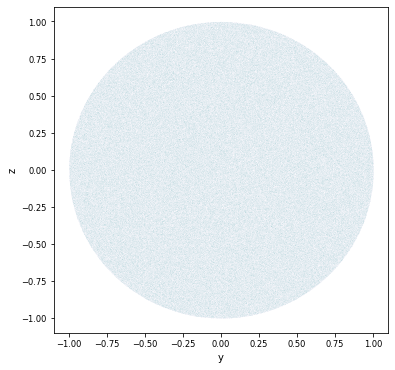

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(ys,zs,s=0.00001)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

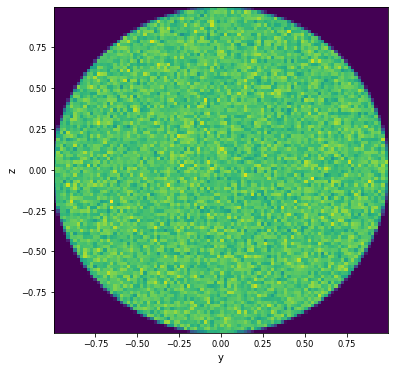

In [21]:
Es = np.random.normal(52.9, 0.5, size=1000000) #GeV

plt.figure(figsize=(6,6))
plt.hist2d(ys, zs, bins=100, weights=Es)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

In [22]:
#Should be s = 2me ( me + E )

In [23]:
# Squared energies in center of mass in MeV
sqrt_s = np.sqrt(Es * 2 * me * 1e3)

## 4.2. Distribution $g(\theta^*,s)$

In [24]:
ths = np.linspace(0,np.pi,1000)
sqs = np.linspace(np.min(sqrt_s),np.max(sqrt_s),1000)
thsv, sqsv = np.meshgrid(ths,sqs)
thsv = thsv.reshape(-1,)
sqsv = sqsv.reshape(-1,)
gs  = g(sqsv**2,thsv)

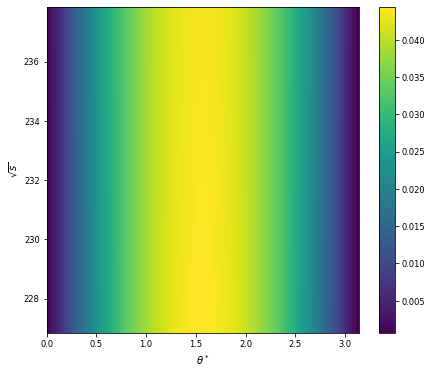

In [25]:
plt.figure(figsize=(7,6))
plt.hist2d(thsv,sqsv,weights=gs, bins=100, density=True)
plt.xlabel("$\\theta^*$")
plt.ylabel("$\\sqrt{s}$")
plt.colorbar() #See that maximum is fixed at theta = pi/2 for the entire range (or it is really close to it)
plt.show()

In [26]:
g(230**2, np.pi/2)

0.48630229827334637

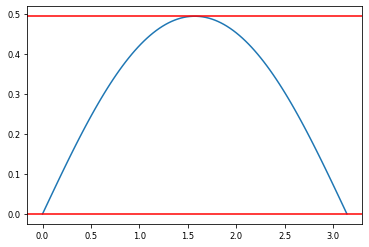

In [27]:
thetas = np.linspace(0,np.pi,100)
plt.plot(thetas,g(220**2,thetas))
plt.axhline(0, color='red')
plt.axhline(g(220**2, np.pi/2), color='red')
plt.show()

## 4.3. Monte Carlo simulation through rejection sampling method


It returns $N$ events with the following variables:
* $y$: coordinate from which the particle comes out from the target.
* $z$: coordinate from which the particle comes out from the target.
* $E$: energy of the positron in the Lab frame (energy of the beam).
* $\sqrt{s}$: energy in the CM frame.
* $\theta$: azimuthal angle in the CM fram.
* $\phi$: polar angle in the CM frame.

In [28]:
def generate_nonmonochromatic(s, batch_size=10000):
    """Generates N = len(s) events for a non-monochromatic beam with s near the threshold.
    Uses rejection method for sampling theta*.
    
    Parameters
    ----------
    s : ndarray (N,)
       Center of mass energies squared for each event [MeV^2]
    batch_size : int, optional
       Internal batch size used to improve performance
    
    Returns
    -------
    statistics : ndarray of size (N, 6)
       Each row is one event, and contains the components of the 3-momenta (in the laboratory frame)
       of the muon-antimuon pair, in [MeV/c]
    """
    
    assert np.all(s > 4 * mmu**2), "Some energies are under the threshold for muon production"
    
    N = len(s)
    ths = np.zeros(N)                            #theta*
    phs = np.random.uniform(0, 2*np.pi, size=N)  #phi*
    
    #generate theta* according to g(s, theta*)
    generated = 0
    g_max = np.max(g(s, np.pi/2)) #for s sufficiently small, the maximum of g is at theta* = pi/2
    
    buffer_s = np.copy(s[:batch_size])
    if (len(buffer_s) < batch_size):
        buffer_s = np.pad(buffer_s, (0, batch_size - len(buffer_s)), 'constant', constant_values=np.nan)
    
    while generated < N:
        #print(generated)
        #print("prima", buffer_s)
        u  = np.random.uniform(0, np.pi, size=batch_size)
        gu = g(buffer_s, u)
        v  = np.random.uniform(0, g_max, size=batch_size)
        
        selected = v <= gu
        n_selected = np.sum(selected)
        
        ths[generated:min(generated+n_selected, N+1)] = u[selected][:min(n_selected, N-generated)]
        
        #replaces already used values of s with new ones
        new_buffer = s[batch_size+generated:min(batch_size+generated+n_selected,N)]
        #print("new_buffer", new_buffer)
        #print("selected", selected)
        
        buffer_s[selected] = np.pad(new_buffer, (0, n_selected-len(new_buffer)), 'constant', constant_values=np.nan)
        #print("Dopo", buffer_s)
        
        generated += n_selected
    #Boost to laboratory frame
    pnorm = p_mu_cm(s)
    px_cm, py_cm, pz_cm = to_cartesian(pnorm, ths, phs)
    
    _, px1 = energy_x_boost(s, px_cm)  #px for first muon
    _, px2 = energy_x_boost(s, -px_cm) #px for second muon
    
    return np.stack((px1, py_cm, pz_cm, px2, -py_cm, -pz_cm), axis=1)

**Implementation details** Vectorized code runs faster, and it is usually easier to parallelize (e.g. on a GPU). So the main target is to *avoid entirely* python loops, or - if this is not possible - make them shorter. In the function above, we start by dividing data in *batches*, i.e. smaller parts that are easier to process without encurring in data transfer bottlenecks. Then, for each batch:

1. We generate $n$ candidates for the $\theta^*$, i.e. random numbers in $[0,\pi]$, where $n$ is the batch size.
   Then we evaluate $g(s,\theta^*)$ over all of these $\theta^*$, using as $\mathbf{s}$ the values stored in a buffer, which is initialized with the first $n$ values of the argument $\mathbf{s}$. Each candidate is accepted if another random variable $v$, picked uniformly in $[0, \max g]$ is lower than $g(s,\theta^*)$. This comparison is also vectorized.
2. Now, statistically, there will be some rejected samples, meaning that some items of $\mathbf{s}$ need to be reused in the next batch. So, all values of $s_i$ that have already resulted in accepted samples are replaced with new ones. If there aren't enough new $s_i$ to fill the "gaps" in the buffer, we use `np.nan` instead. In fact, according to the floating point specification, any computation (such as sums, multiplications, etc.) done with NaN will return NaN. So $g({\rm NaN},\theta^*)$ will be always NaN, and every comparison (for example the <= we use) will return False, meaning that introducing NaNs can't produce new selected $\theta^*$.
3. After having "refilled" the $s$ buffer, we can reiterate the cycle. Note that at every operation an entire batch is processed at once. Only at the execution end there is some loss of perfomance due to the presence of missing values.




In the laboratory frame, the electron is stationary, while the positron is directed along $\hat{x}$:
$$p_{e^-} = (m_e, 0, 0, 0); \qquad p_{e^+} = (\mathcal{E}_+, \sqrt{\mathcal{E}_+^2 - m_e^2}, 0, 0)$$
So $s$ is:
$$ s = (p_{e^-} + p_{e^+})^2 = m_e^2 + \mathcal{E}_+^2 + 2 m_e \mathcal{E}_+ - \mathcal{E}_+^2 + m_e^2 = 2m_e(\mathcal{E}_+ + m_e) \Rightarrow \mathcal{E}_+ = \frac{s}{2 m_e} - m_e$$

In [29]:
num_samples = int(1e5)

#Let's fix the center sqrt(s) at 230MeV. The E+ has a width of 0.5 GeV, that corresponds to a width of s equal to:
sigma_mu = 0.1 * 1e3 #0.5 GeV 
sigma_s  = 2 * me * (sigma_mu + me) 

s_vec = np.random.normal(213**2, sigma_s, size=num_samples)

momenta = generate_nonmonochromatic(s_vec)

C:\Users\39349\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


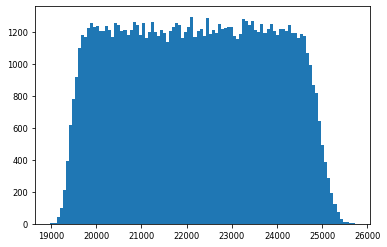

In [30]:
plt.hist(momenta[:,3], bins=100)
plt.show()

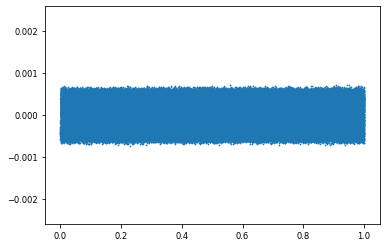

In [31]:
decay_point = np.random.uniform(0, 1, size=num_samples)
deltay = momenta[:,1] / momenta[:,0] * decay_point + np.random.uniform(0,1, size=num_samples)

plt.scatter(deltay , momenta[:,1]/momenta[:,0], s = .5) #plot y y'

# 5. Tracking detector statistics <a class="anchor" id="Report.5"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

In [32]:
#Add pictures
#Test if it works

Let's compute the variation in the the trajectory induced by the presence of a magnet, each particle is identified by it's position at the end of the berillium block and it's tri-momentum at the exit.

Consider a particle with initial position $\mathbf{x}_0 = (x_0, y_0, z_0)^T$ and velocity $\mathbf{v}_0 = (v_{0x}, v_{0y}, v_{0z})^T$ in the laboratory frame, moving inside a magnetic field $\mathbf{B} = (0,0,B)^T$. The solution of the equation of motion is given by:
$$ 
    \begin{cases}
    x(t)= x_0 + \frac{v_{0y}}{\omega} + \dfrac{v_{\perp}}{\omega}\sin (\omega t -\alpha)\\
    y(t)= y_0 - \frac{v_{0x}}{\omega} + \dfrac{v_{\perp}}{\omega}\cos (\omega t -\alpha)\\
    z(t)= z_0 + v_{0z}t
    \end{cases} 
    \qquad 
    \begin{cases}
    p_x(t)= p_\perp \cos (\omega t -\alpha)\\
    p_y(t)= -p_\perp \sin (\omega t -\alpha)\\
    p_z(t)= p_{z0}
    \end{cases} 
$$
With:
$$
\omega =\frac{qB}{m\gamma}; \qquad \alpha=\arctan\left(\frac{v_{0y}}{v_{0x}}\right)=\arctan \left(\frac{p_{0y}}{p_{0x}}\right); \quad v_\perp=\sqrt{v_{0x}^2+v_{0y}^2}; \quad p_\perp = \sqrt{p_{0x}^2 + p_{0y}^2}
$$
As the relation between momentum and velocity is given by:
$$
\mathbf{p}c = m \gamma \mathbf{v}
$$
we have:
$$
 \frac{v_\perp}{\omega}=\frac{c\sqrt{p_{0x}^2+p_{0y}^2}}{qB}
$$
The particle exits the magnetic field after travelling a fixed distance $x(\hat{t})$ over the $\hat{x}$ axis, leading to:
$$
\omega \hat{t}=\alpha + \arcsin \left(\left[x(\hat{t}) - x_0 - \frac{v_{0y}}{\omega} \right] \frac{\omega}{v_\perp} \right)
$$
After the magnet the EOM is the one of a free particle.

In [33]:
#let's put the values
import scipy as sp
import math
import numpy as np

q   = 1.602176634e-19 #Elementary charge [C]
B   = 1.7 #Magnetic field intensity [B]
c   = 3e8 #Speed of light [m/s]
mmu = 105.6583755 #Muon mass [MeV/c]

qB  = q*B 

In [34]:
#Fixed the c
def bend_particle (positions, momenta, meters): 
    """Computes the final position and momentum of N particles starting at @position, with @momentum, subject to a constant magnetic field
    along z, and stopping after @meters in the x direction.
       
    Parameters
    ----------
    positions : ndarray, (N, 3)
       Starting coordinates for the particle [m]
    momenta : ndarray, (N, 3,)
       Starting momentum for the particle [MeV/c]
    meters : float
       The particle stops after travelling @meters in the x direction
    
    Returns
    -------
    final_pos, final_p : Tuples of ndarray, each of dimension (N, 3)
       final_pos = Final coordinates for the particles [m]
       final_p   = Final particles momentum [Mev/c]
    """
    
    assert len(positions) == len(momenta), "Positions and momenta must be of the same length"
    assert len(positions.shape) == len(momenta.shape) == 2, "Positions and momenta must be matrices"
    
    p_norm_sq = np.sum(np.square(momenta), axis=1) #|p|^2 in [Mev^2/c^2]
    
    cc = 2.99792458e2 #to reduce numerical errors (=c/1e6)
    
    gamma = np.sqrt(p_norm_sq / (mmu**2) + 1)
    omega = (B * c) / (mmu * cc * gamma)
    
    alpha = np.arctan(momenta[:,1] / momenta[:,0]) 
    
    
    p_pe  = np.sqrt(np.sum(np.square(momenta[:,:2]), axis=1))
    v_w   = p_pe / (B * cc) #rapporto v perperdicolare su omega, il 10^6 è perche il momento è in Mev
    #EDIT: v_w = |vpe|/w deve essere in [m] La radice dei momenti è in MeV/c, per cui non serve dividere per q (dato che siamo in eV), e bisogna aggiungere una c al denominatore  
    #Full conto: MeV/c / (C * T) = e/c * 1e6 [m], dove e è la carica dell'elettrone, e c la velocità della luce. 
    
    wt = alpha + np.arcsin((meters - positions[:,0] - momenta[:,1] / (B * cc)) / v_w) #omega per tempo (EDITED)
    
    final_position = np.stack(( v_w * np.sin(wt - alpha) + momenta[:,1] / (B * cc),
                                v_w * np.cos(wt - alpha) - momenta[:,0] / (B * cc), 
                                momenta[:,2] * wt / (B * cc)
                               ), axis=1)    
    final_position += positions #sum initial position
    
    final_momentum = np.stack((p_pe * np.cos(wt - alpha), -p_pe * np.sin(wt - alpha), momenta[:,2]), axis=1)
    
    return final_position, final_momentum


def free_particle(positions, momenta, meters):
    """Computes the final positions of N particles, given their initial @positions and @momenta, after having travelled @meters
    in the x direction (uniform motion)
    
    Parameters
    ----------
    positions : ndarray of size (N,3)
       Particles initial positions [m]
    momenta : ndarray of size (N,3)
       Particles initial momenta [MeV/c]
    meters : 
       Motion stops after having travelled this distance [m] over the x axis
    
    Returns
    -------
    final_position : ndarray of size (N,3)
       Final positions for the particles [m]
    """
    
    p_norm_sq = np.sum(np.square(momenta), axis=1) #|p|^2 in [Mev^2/c^2]
    gamma = np.sqrt(p_norm_sq + mmu**2) / mmu
    
    velox = momenta * c / (mmu * gamma[..., np.newaxis])
    arrival_times = meters / velox[:,0] #time travel on the x axis
    
    final_position = np.stack(( np.full(len(positions), fill_value = meters),
                                velox[:, 1] * arrival_times,
                                velox[:, 2] * arrival_times
                              ), axis=1)
    final_position += positions
    
    return final_position

**Simulation**

C:\Users\39349\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


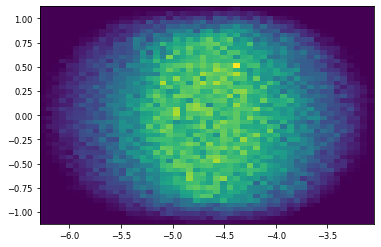

In [35]:
#Magnet deflection
num_samples = int(1e5)

s_vec = np.random.normal(213**2, sigma_s, size=num_samples) #Generate energies
momenta = generate_nonmonochromatic(s_vec) #Generate non-monochromatic events

y, z = generate_yz(num_samples, 1) 
#Not all particles scatter at the same position in the target. However, as the beryllium block is only 6cm thick, and thetamax
#in the scattering is <.01 rad, the additional transversal deviation gained is negligible (a few micron, compared to a beam width
#of 2cm)
x = np.zeros(num_samples) #All particles enter B at the same position. (0,0,0) is the center of the beam at the target exit.
#x is the longitudinal beam direction, while y and z are the trasversal ones


positions = np.stack((x, y, z), axis=1) / 100 #[cm]
f_pos, f_mom = bend_particle(positions, momenta, 2)

plt.hist2d(f_pos[:,1] * 100, f_pos[:,2] * 100, bins=50)
plt.show()

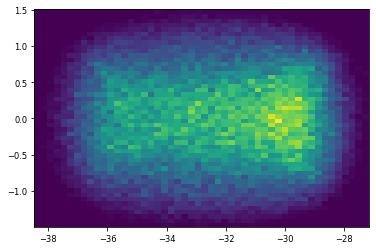

In [36]:
#Linear propagation after the magnet
ff_pos = free_particle(f_pos, f_mom, 6)

plt.hist2d(ff_pos[:,1] * 100, ff_pos[:,2] * 100, bins=50)
plt.show()

# 6. Comparison with Babayaga simulator results <a class="anchor" id="Report.6"></a>
<div style="text-align: right"><a href="#Report.index">Return to index</a></div>

The results of our simulations have been compared to the ones coming from babayaga_NLO ([2]). The executable file was run with the following parameters value:

* N of events: $10^7$
* Final state: $\mu^-\mu^+$
* CoM energy: $0.230 \ \mathrm{GeV}$
* Acollinearity: $10°$

It is important to observe that Babayaga results are given in CoM frame.

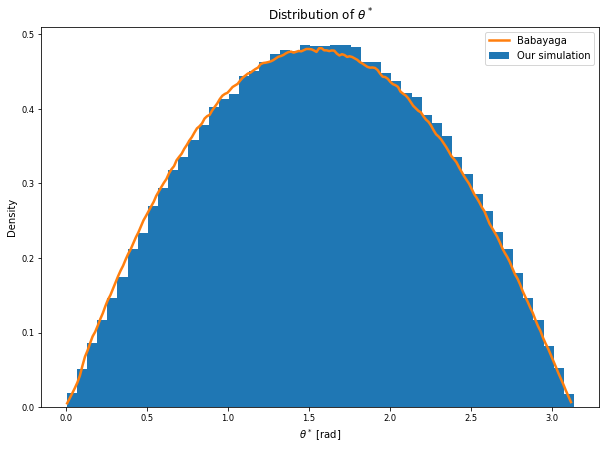

In [37]:
babayaga_el_th = np.radians(np.loadtxt("./babagaya_run/matched_el_th_exp_200.txt").T)
theta_samples= np.loadtxt("./thetas_dist.txt")

plt.figure(figsize=(10,7))
N_th, bins_th, _ = plt.hist(theta_samples, bins=50, density=True, label='Our simulation')
normalization    = np.max(babayaga_el_th[1])/np.max(N_th)

x_babayaga  = (babayaga_el_th[0][1:] + babayaga_el_th[0][:-1]) / 2
y_babayaga  = (babayaga_el_th[1][1:] + babayaga_el_th[1][:-1]) / 2 

plt.plot(x_babayaga, y_babayaga/normalization, linewidth=2.5, label="Babayaga")
plt.xlabel(r'$\theta^*$ [rad]')
plt.ylabel(r'Density')
plt.title(r'Distribution of $\theta^*$')
plt.legend()

plt.show()

# Citations
- [1]: Electron-positron annihilation into muon-antimuon pairs, full calculation, [link](http://www.physics.usu.edu/Wheeler/QFT/PicsII/QFT10Feb23Muon.pdf)
- [2]: [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator.

In [38]:
q = 1.60217e-19 #Electron charge          [C]
B = 1.7     #Magnetic field intensity     [T]
muon_mass = 1.883e-28 #Muon mass [kg]
l_magnet = 2 #magnet length in [m]

def magnetic_trajectory(yz, momenta):
    y0 = yz[:,0]
    z0 = yz[:,1]
    pnorms_sq = np.sum(np.square(momenta[:,:3]), axis=1)
    gamma_mus = np.sqrt(pnorms_sq / (mmu**2) + 1)
    #np.sqrt(pnorms_sq + mmu**2) / mmu
    
    velocities = momenta[:,:3] * 3e8 / (mmu * gamma_mus[..., np.newaxis])
    
    vx = velocities[:,0]
    vy = velocities[:,1]
    vz = velocities[:,2]

    v_norms = np.sqrt(np.sum(np.square(velocities), axis=1))
    omegas = q * B / (muon_mass * gamma_mus)

    radii = np.sqrt( np.square(velocities[:,0]/omegas) + np.square(velocities[:,1]/omegas) )
    yf = ( np.sqrt( np.square(radii * omegas) - np.square(omegas * l_magnet) + 2 * l_magnet * vy * omegas
                            - np.square(vy) ) - vx ) / omegas + y0
    d_square = l_magnet**2 + np.square(y0 - yf)
    costhetas = 1 - d_square / (2 * np.square(radii))

    tf = radii * np.arccos(costhetas) / v_norms 
    zf = vz * tf + z0
    
    return yf, zf

$$ v = \frac{pc}{m \gamma} $$


$$ \gamma_\mu = \frac{1}{\sqrt{1-\beta_\mu^2}} = \frac{\sqrt{p_\mu^2 + m_\mu^2}}{m_\mu} \qquad \beta_\mu = \frac{p_\mu}{\mathcal{E}_\mu} = \frac{p_\mu}{\sqrt{m_\mu^2 + p_\mu^2}} \qquad p_\mu^2 = ||{\vec{p}_\mu}||^2 $$

In [39]:
#Plot immediately after the magnet
#plt.xlabel(r"$\Delta y$ [cm]")
#plt.ylabel(r"$\Delta z$ [cm]")
#plt.scatter(y0*100, z0*100, s=.9, c='red', label="Before magnet")
#plt.scatter((yf-np.mean(yf)) * 100, (zf-np.mean(zf)) * 100, s=.9, label="After magnet", c='b') #in [cm]
#plt.legend()
#plt.plot()